# **Description**
In this notebook you will firstly train a CNN on cifar10 dataset. The CNN architecture you are going to use is ResNet18. You are going to train the model from scratch. Then you are going to implement targeted and untargeted FGSM attack and evaluate the performance of the trained model on the adversarial data.


**Attention!** Make sure you do not miss the questions asked at the end of the notebook.






Name: Mohammad Taslimi

Student ID: 99101321

#**Setups**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

In [ ]:
cd '/content/drive/MyDrive/'

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import argparse
import matplotlib.pyplot as plt
import numpy as np

In [3]:
batch_size = 128
lr = 1e-3
epochs = 100

#**Data Preparation (10 pts)**
Use cifar10 dataset provided in torchvision and create train and test dataloaders according to the given transformations.

In [4]:
print('==> Preparing data..')

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])


###################################################
#prepare training and test datasets and loaders   #
###################################################



######################
# Your code goes here

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

######################

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


#**Building The Model**

In [5]:
########################################
#define the model and optimizer        #
########################################

print('==> Building model..')
net = torchvision.models.resnet18(pretrained = False)

device = (torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))
net = net.to(device)

if device == 'cuda':
    net = torch.nn.DataParallel(net)
    cudnn.benchmark = True

optimizer =  optim.SGD(net.parameters(), lr=lr, momentum=0.9)

==> Building model..


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


#**Training and Evaluating The Model (20 pts)**

In [6]:
#############################################
# define train and test functions           #
#############################################

def train(epoch, net, optimizer, trainloader, criterion):
    acc = None
    avg_loss = None
    ######################
    # Your code goes here
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    avg_loss = train_loss / (batch_idx + 1)
    acc = 100. * correct / total
    print(f'Train Loss: {avg_loss} | Acc: {acc}% ({correct}/{total})')
    return avg_loss, acc



    ######################
    return avg_loss, acc


def test(epoch, net, testloader, criterion):
    acc = None
    ######################
    # Your code goes here
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    acc = 100. * correct / total
    print(f'Test Loss: {test_loss / (batch_idx + 1)} | Acc: {acc}% ({correct}/{total})')
    return acc

    ######################
    return acc



In [ ]:
######################################################################
#train your model, make sure to save loss and accuracy in all epochs #
######################################################################

######################
# Your code goes here

train_loss_list = []
train_acc_list = []
test_acc_list = []

criterion = nn.CrossEntropyLoss()
for epoch in range(epochs):
    train_loss, train_acc = train(epoch, net, optimizer, trainloader, criterion)
    test_acc = test(epoch, net, testloader, criterion)

    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)


print("Training Loss per Epoch:", train_loss_list)
print("Training Accuracy per Epoch:", train_acc_list)
print("Test Accuracy per Epoch:", test_acc_list)





#######################


Epoch: 0
Train Loss: 2.0398382692385817 | Acc: 32.552% (16276/50000)
Test Loss: 1.5647549553762508 | Acc: 42.7% (4270/10000)

Epoch: 1
Train Loss: 1.5425235231209289 | Acc: 43.568% (21784/50000)
Test Loss: 1.4189866494528856 | Acc: 48.53% (4853/10000)

Epoch: 2
Train Loss: 1.4198487118991745 | Acc: 48.538% (24269/50000)
Test Loss: 1.3104779192163973 | Acc: 52.26% (5226/10000)

Epoch: 3
Train Loss: 1.325843304624338 | Acc: 51.914% (25957/50000)
Test Loss: 1.241056618811209 | Acc: 54.81% (5481/10000)

Epoch: 4
Train Loss: 1.2568853902999702 | Acc: 54.508% (27254/50000)
Test Loss: 1.2350629598279543 | Acc: 55.06% (5506/10000)

Epoch: 5
Train Loss: 1.2000872094917785 | Acc: 56.722% (28361/50000)
Test Loss: 1.143355257148984 | Acc: 59.29% (5929/10000)

Epoch: 6
Train Loss: 1.1480230391787751 | Acc: 58.406% (29203/50000)
Test Loss: 1.0751296417622627 | Acc: 61.45% (6145/10000)

Epoch: 7
Train Loss: 1.1052892665424006 | Acc: 60.37% (30185/50000)
Test Loss: 1.0506632577014874 | Acc: 62.12% (6

In [7]:
########################################
#save your model and history           #
########################################


######################
# Your code goes here

import json
# torch.save(net, 'model.pth')


# history = {
#     'train_loss': train_loss_list,
#     'train_acc': train_acc_list,
#     'test_acc': test_acc_list,
# }
# with open('history.json', 'w') as f:
#     json.dump(history, f)

# print("Model and training history have been saved.")




### load ##################


net = torch.load('model.pth')
net = net.to(device)
net.eval()

with open('history.json', 'r') as f:
    history = json.load(f)

train_loss_list = history['train_loss']
train_acc_list = history['train_acc']
test_acc_list = history['test_acc']


criterion = nn.CrossEntropyLoss()
epoch = 1
test_acc = test(epoch, net, testloader, criterion)


#######################

Test Loss: 0.8207170457779607 | Acc: 78.39% (7839/10000)


##**Train and Test Loss and Accuracy Plots**

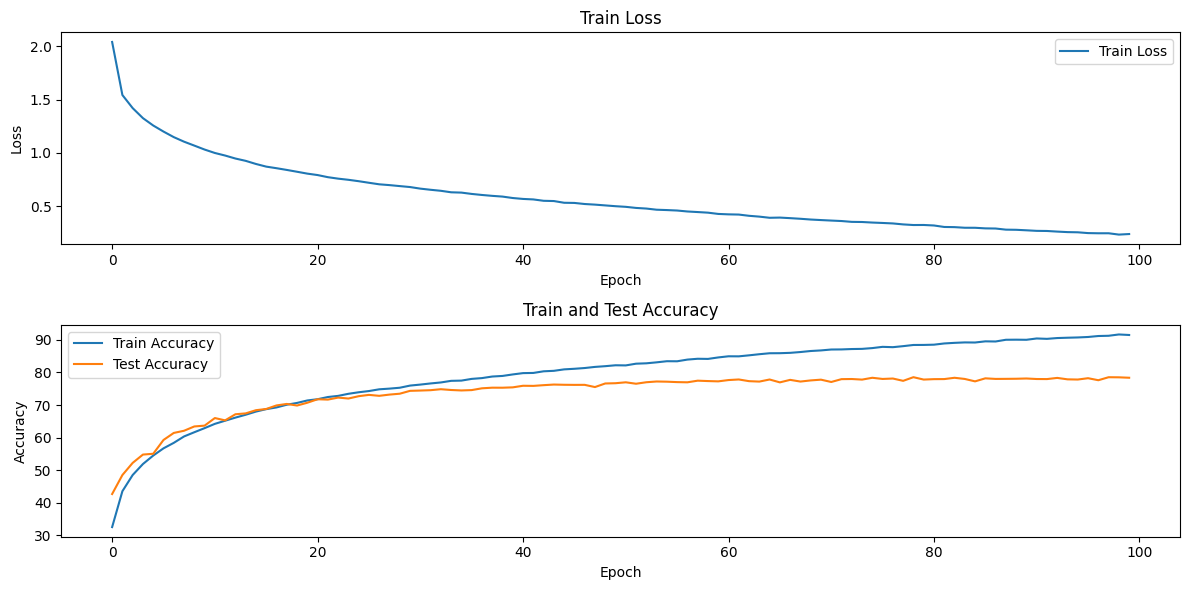

In [8]:
#############################################################
#plot train and test loss and accuracy dusring the training #
#############################################################

######################
# Your code goes here

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6))

ax1.plot(train_loss_list, label='Train Loss')
ax1.set_title('Train Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(train_acc_list, label='Train Accuracy')
ax2.plot(test_acc_list, label='Test Accuracy')
ax2.set_title('Train and Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()


plt.tight_layout()
plt.show()


######################

# **Visualizing filters (12pts)**

In this section, you're going to visualize filters of some of the layers.

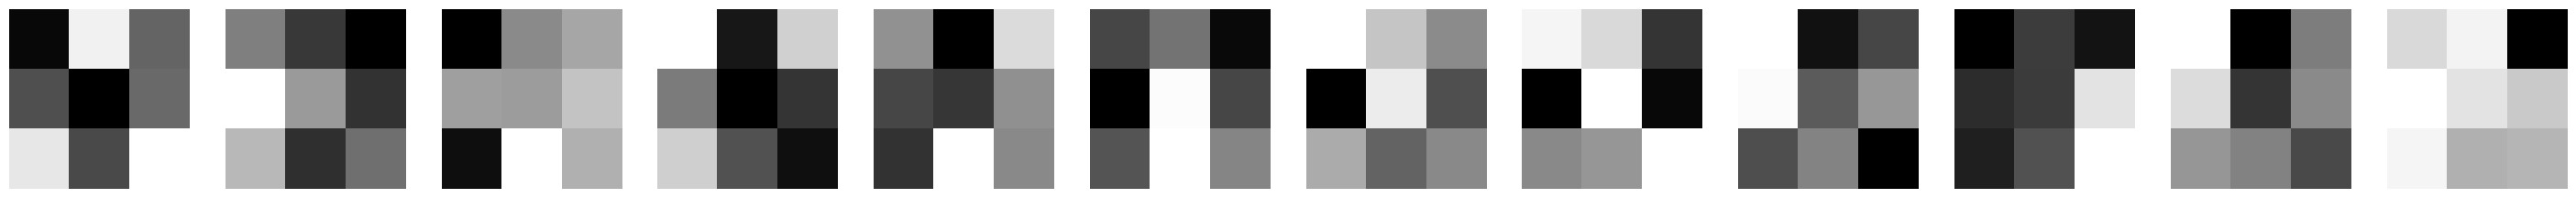

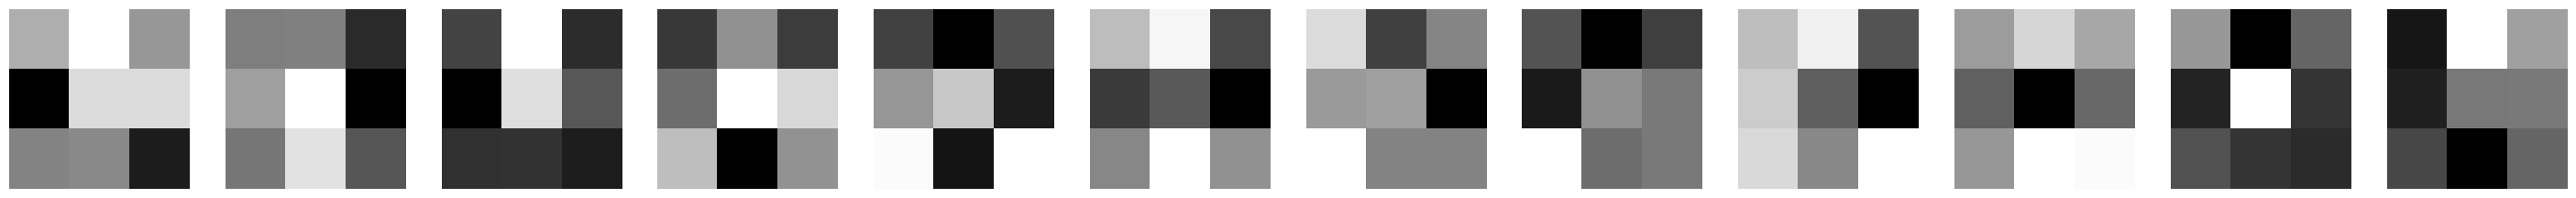

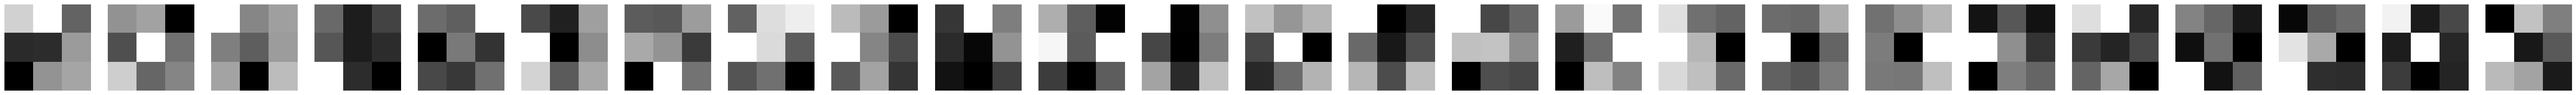

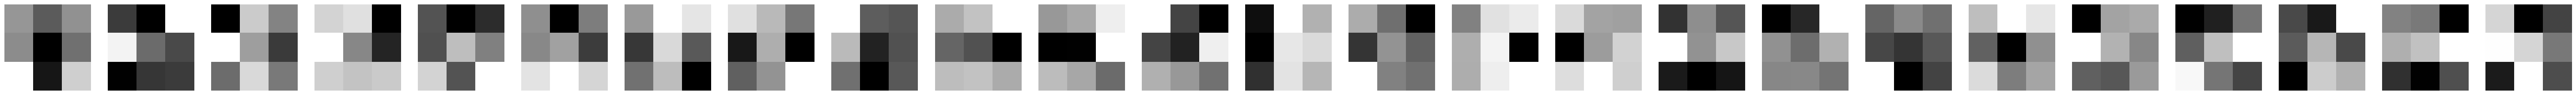

In [9]:
#########################################################
#Visualize the filters of the specified layers          #
#########################################################


conv_layers = [net.layer1[0].conv1, net.layer1[0].conv2, net.layer2[0].conv1, net.layer2[0].conv2]

##############################
# Your code goes here
def visualize_filters(conv_layers):
    for i, layer in enumerate(conv_layers):

        weight_tensor = layer.weight.data.cpu()

        num_filters = weight_tensor.shape[0]

        fig, axarr = plt.subplots(1, num_filters//5, figsize=((num_filters//5)*3, 3))

        for j in range(num_filters//5):
            axarr[j].imshow(weight_tensor[j][0], cmap='gray')
            axarr[j].axis('off')

        plt.show()

visualize_filters(conv_layers)
##############################



#**Attention Heatmap (8pts)**


Some methods have been proposed to measure how much a model attends to each individual pixel in an image. One of the most well-known methods for this, is [GradCAM](https://github.com/jacobgil/pytorch-grad-cam/), which utilizes the gradient of the model on the last convolutional layers to compute attention scores. Here we want to visualize a number of samples and the model's attention heatmap on them.

In [ ]:
!pip install grad-cam

In [11]:
from pytorch_grad_cam import XGradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

Select 2 random images from each class in the test set and put them in an array called samples.       

In [12]:
samples = None
######################
# Your code goes here

test_labels = np.array(testset.targets)

samples = []

for i in range(10):
    indices = np.where(test_labels == i)[0]

    indices = np.random.choice(indices, 2, replace=False)

    for index in indices:
        samples.append(testset[index])

print("Selected samples:", samples)


Selected samples: [(tensor([[[ 2.5141,  2.5141,  2.5141,  ...,  1.6418,  1.6030,  1.6224],
         [ 2.5141,  2.5141,  2.5141,  ..., -0.1804, -0.1998, -0.0447],
         [ 2.5141,  2.5141,  2.5141,  ..., -0.2580, -0.2773, -0.2192],
         ...,
         [ 2.5141,  2.5141,  2.5141,  ..., -0.6650, -0.6844, -0.6650],
         [ 2.5141,  2.5141,  2.5141,  ..., -0.5100, -0.5875, -0.5875],
         [ 2.5141,  2.5141,  2.5141,  ..., -0.0835, -0.0835, -0.0447]],

        [[ 2.5968,  2.5968,  2.5968,  ...,  1.9281,  1.9085,  1.9085],
         [ 2.5968,  2.5968,  2.5968,  ...,  0.3941,  0.4138,  0.5514],
         [ 2.5968,  2.5968,  2.5968,  ...,  0.5514,  0.5318,  0.4924],
         ...,
         [ 2.5968,  2.5968,  2.5968,  ..., -0.6089, -0.6286, -0.6089],
         [ 2.5968,  2.5968,  2.5968,  ..., -0.5106, -0.6089, -0.6089],
         [ 2.5968,  2.5968,  2.5968,  ..., -0.0582, -0.0582, -0.0386]],

        [[ 2.7537,  2.7537,  2.7537,  ...,  2.5391,  2.5196,  2.5196],
         [ 2.7537,  2.753

 Now we define the heatmap generator. Here we use XGradCAM, which is an extention of the original GradCAM.

In [13]:
heat_map_generator = XGradCAM(
model=net,
target_layers=[net.layer2[-1]],
)

Visualize the selected images, and the attention heatmap of the model on each of them.

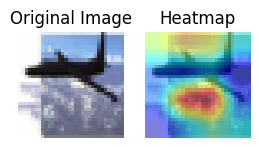

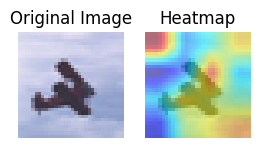

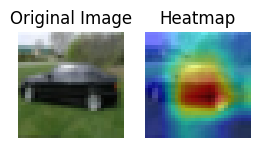

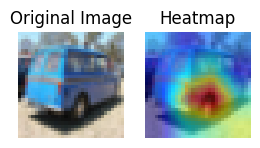

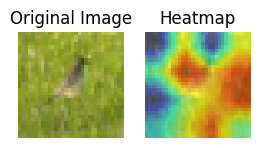

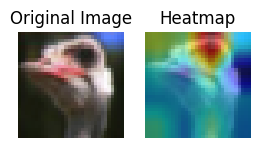

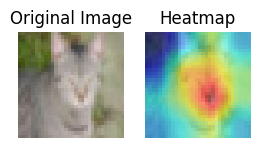

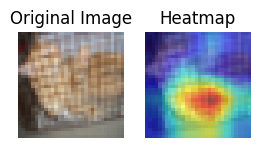

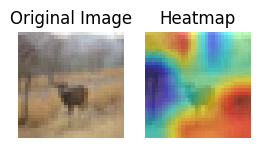

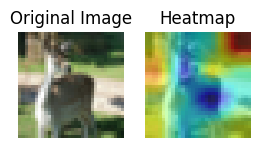

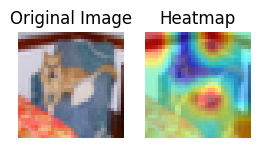

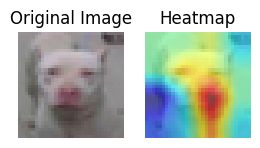

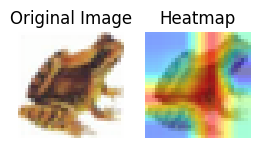

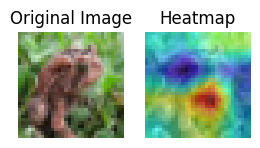

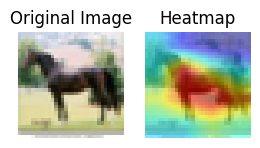

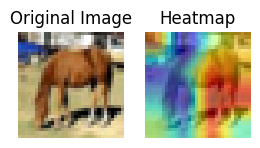

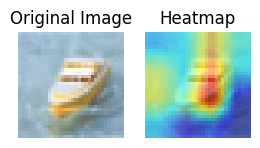

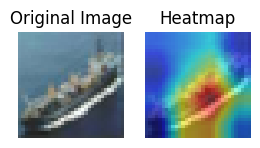

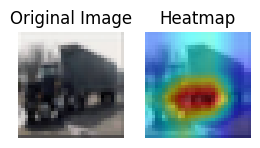

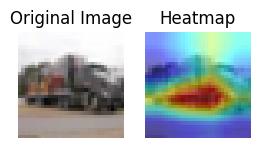

In [14]:
#############################################################################################
#visualize two test sample from each class and their corresponding attention heatmap        #
#############################################################################################
def unnormalize(img):
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2023, 0.1994, 0.2010])
    img = img.detach().numpy().transpose((1, 2, 0))
    img = std * img + mean
    img = np.clip(img, 0, 1)
    return img

def visualize_heatmap(image, unnormalized_image, heat_map_generator):
    '''
    inputs:
        image: image which is normalized according to the statistics of the dataset. type: torch.Tensor. shape: [1, channels, width, height]
        unnormalized_image: image that you are going to visualize. the value of its pixels must be in [0,1]. type: numpy array. shape: [width, height, channels]
        heat_map_generator: XGradCAM instance

    returns: visualization of the heatmap on the image
    '''
    grayscale_cam = heat_map_generator(input_tensor=image)
    grayscale_cam = grayscale_cam[0, :]

    vis = show_cam_on_image(unnormalized_image, grayscale_cam, use_rgb=True)
    return vis


######################
# Your code goes here

for sample in samples:
    image, label = sample

    image_tensor = torch.Tensor(image).unsqueeze(0)
    unnormalized_image = unnormalize(image)

    heatmap = visualize_heatmap(image_tensor, unnormalized_image, heat_map_generator)

    plt.figure(figsize=(3, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(unnormalized_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off')

    plt.show()



#**FGSM Attack (50 pts)**
In this section you must implement targeted and untargeted FGSM attack and evalute the trained model performance on the adversarial data.

##**Untargeted FGSM Attack (30 pts)**

In [15]:
########################################
#define untargeted FGSM attack         #
########################################


def FGSM (model, x, y, epsilon):
  """
  inputs:
    model: model to be attacked
    x: input image
    y: label
    epsilon: clipping threshold for FGSM

  outputs:
    x': the perturbed image
    delta: the added perturbation
    y': prediction of the model for the perturbed input
  """
  delta = None

  ######################
  # Your code goes here

  x.requires_grad = True

  outputs = model(x)
  loss = torch.nn.functional.cross_entropy(outputs, y)

  model.zero_grad()
  loss.backward()

  grad_x = x.grad.data
  delta = epsilon * grad_x.sign()
  x_prime = x + delta



  return x_prime, delta, model(x_prime)


###**Evaluation**


 For $\epsilon \in \{\frac{1}{255}, \frac{4}{255}, \frac{8}{255},\}$ report the performance of the model on targeted FGSM attack on the test data.

In [16]:
  ######################
  # Your code goes here


epsilons = [1/255, 4/255, 8/255]
accuracies = []

for epsilon in epsilons:
    correct = 0

    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        perturbed_images, _, outputs = FGSM(net, images, labels, epsilon)

        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

    accuracy = correct / len(testloader.dataset)
    accuracies.append(accuracy)

    print(f"Epsilon: {epsilon}, Accuracy: {accuracy}")


Epsilon: 0.00392156862745098, Accuracy: 0.7291
Epsilon: 0.01568627450980392, Accuracy: 0.5769
Epsilon: 0.03137254901960784, Accuracy: 0.4107


###**FGSM by gradually increasing $ϵ$**

FGSM attack may not work for small $\epsilon$, on the other hand we want to alter image as insignificant as possible, so here is what we do, we start from $\epsilon = \frac{1}{255}$ and if the attack was unsuccessful, we increase $\epsilon$ by $\frac{1}{255}$. The procedure goes on until the predicted label is different from the ground truth.

In [17]:
#######################################################
#increase epsilon gradually till the label is changed. The function can be implemented recursively.#
#######################################################

def generate_adversarial_FGSM (model, x, label, epsilon=1/255):
  """
  inputs:
    model: model to be attacked
    x: input image
    y: label
    epsilon: intial clipping threshold for FGSM

  outputs:
    epsilon: the epsilon that flips the label.
    delta: the added perturbation
    y': prediction of the model for the perturbed input
  """



  ######################
  # Your code goes here

  x.requires_grad = True

  outputs = model(x)
  init_pred = outputs.max(1, keepdim=True)[1]

  if init_pred.item() != label.item():
      return epsilon, torch.zeros_like(x), init_pred

  loss = torch.nn.functional.cross_entropy(outputs, label)

  model.zero_grad()

  loss.backward()

  data_grad = x.grad.data

  perturbed_data = x + epsilon*data_grad.sign()

  outputs = model(perturbed_data)

  final_pred = outputs.max(1, keepdim=True)[1]
  if final_pred.item() == label.item():
      return generate_adversarial_FGSM(model, x, label, epsilon + 1/255)
  else:
      return epsilon, perturbed_data - x, final_pred


### **Visualization**
Pick 10 samples from cifar10 test set, each from one class, make sure the selected samples are classified correctly. Plot these samples. Take note that the selected data must not be transformed by train or test transformations while visualisation.

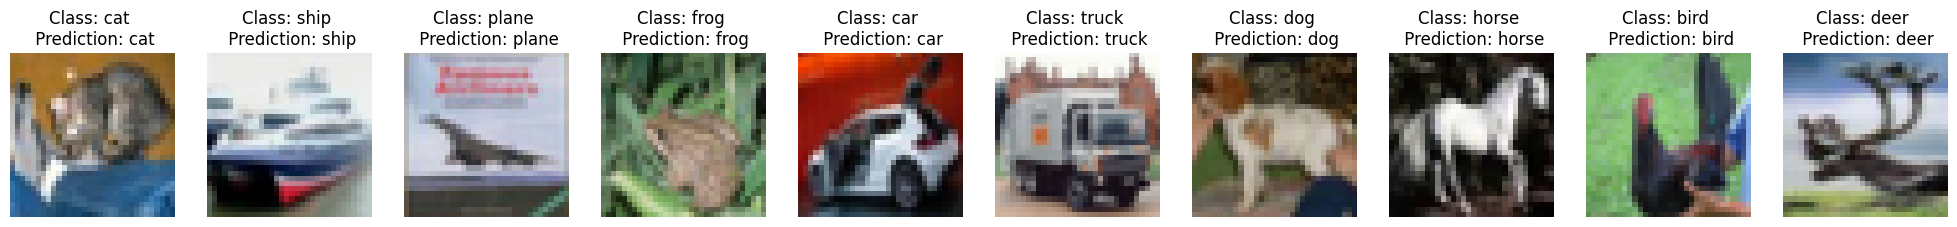

In [18]:
#############################################################################################
#visualize one test sample from each class and make sure that they are correctly labeled.   #
#save index of these samples, since they are needed in the following sections.              #
#############################################################################################






#######################
# Your code goes here

def unnormalize(img):
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2023, 0.1994, 0.2010])
    img = img.detach().numpy().transpose((1, 2, 0))
    img = std * img + mean
    img = np.clip(img, 0, 1)
    return img

testloader2 = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)


class_names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
selected_samples = []

for images, labels in testloader2:
    images = images.to(device)
    labels = labels.to(device)
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    if predicted == labels and labels.item() not in [label for img, label, pred in selected_samples]:
        selected_samples.append((images, labels.item(), predicted.item()))

    if len(selected_samples) == len(class_names):
        break


fig, axs = plt.subplots(1, len(class_names), figsize=(25, 25))

for i, (img, label, pred) in enumerate(selected_samples):
    img = img.squeeze().cpu()
    img = unnormalize(img)
    axs[i].imshow(img)
    axs[i].set_title(f"Class: {class_names[label]} \n Prediction: {class_names[pred]}")
    axs[i].axis('off')

plt.show()


Now, apply untargetted FGSM attack ``` generate_adversarial_FGSM ``` on the selected samples. Visualize the original image, the perturbed image, and the perturbation. since the perturbation is imperceptible, magnify it by the value of $\frac{1}{\epsilon}$ before visualization.

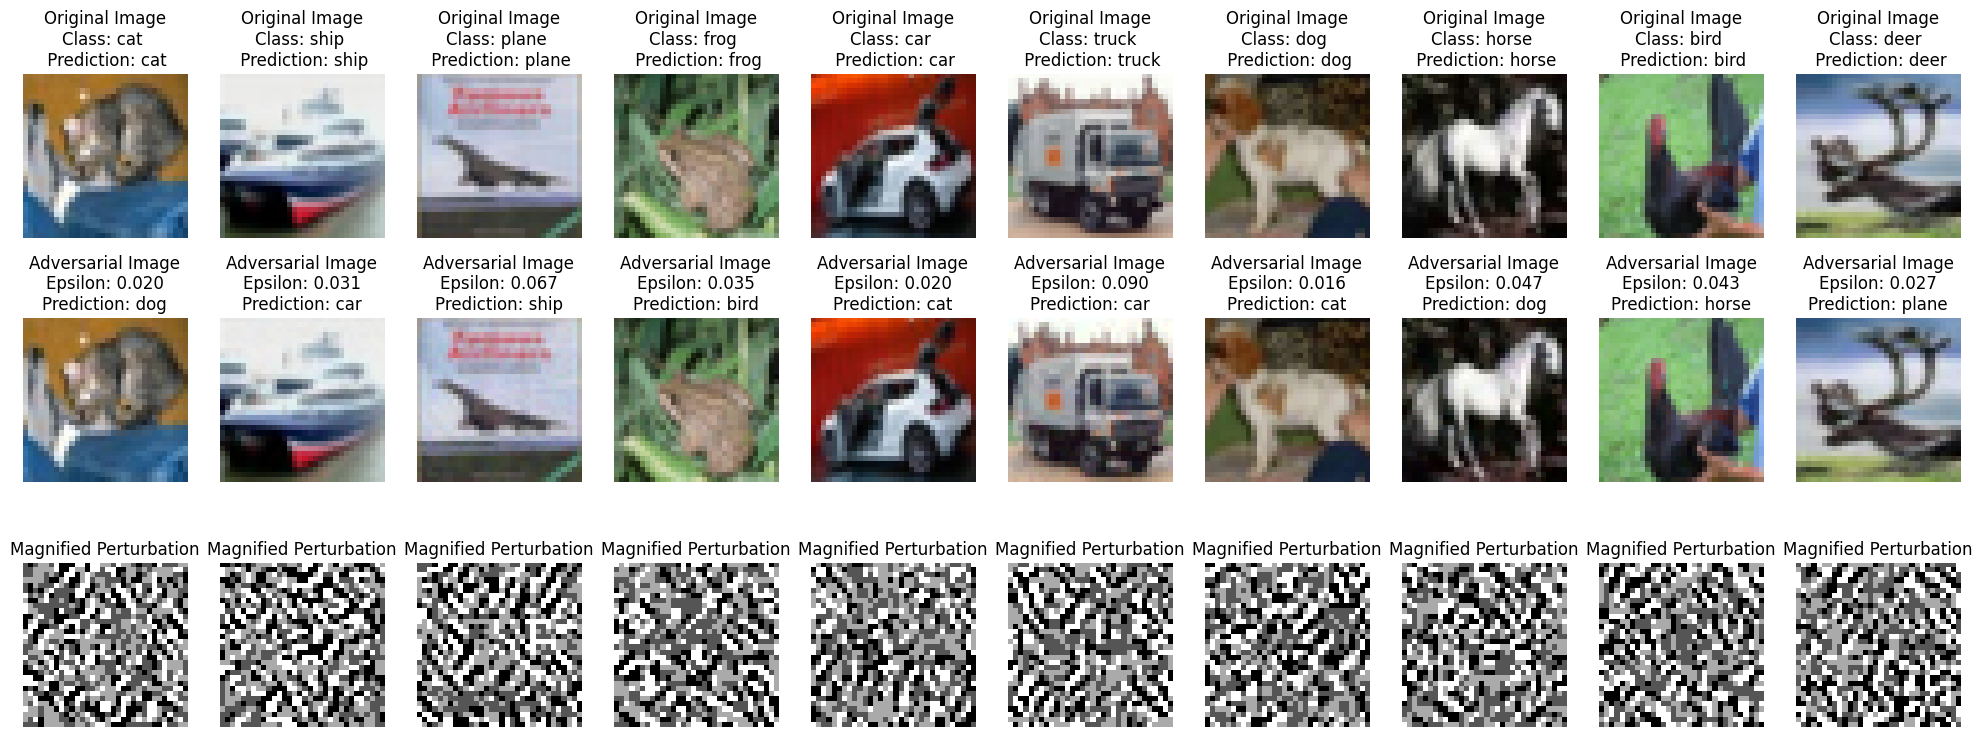

In [19]:
fig, axs = plt.subplots(3, len(selected_samples), figsize=(25, 9))

for i, (img, label, pred) in enumerate(selected_samples):

    original_img = unnormalize(img.squeeze().cpu())
    axs[0, i].imshow(original_img)
    axs[0, i].set_title(f"Original Image\nClass: {class_names[label]} \n Prediction: {class_names[pred]}")
    axs[0, i].axis('off')

    epsilon, delta, adv_pred = generate_adversarial_FGSM(net, img, torch.tensor([label]).to(device))
    adv_img = img + delta

    unnormalized_adv_img = unnormalize(adv_img.squeeze().cpu().detach())
    axs[1, i].imshow(unnormalized_adv_img)
    axs[1, i].set_title(f"Adversarial Image\nEpsilon: {format(epsilon, '.3f')}\nPrediction: {class_names[adv_pred]}")
    axs[1, i].axis('off')

    perturbation = delta.squeeze().cpu().detach().numpy()
    magnified_perturbation = np.average(perturbation, axis=0) / epsilon
    axs[2, i].imshow(magnified_perturbation, cmap='gray')
    axs[2, i].set_title("Magnified Perturbation")
    axs[2, i].axis('off')

plt.show()


##**Targeted FGSM Attack (20pts)**
implement targeted FGSM attack.

In [20]:
########################################
#define tergeted FGSM attack           #
########################################

def FGSM_targeted (model, x, y, y_targ, epsilon):
  """
  inputs:
    model: model to be attacked
    x: input image
    y: label
    y_targ = target label
    epsilon: clipping threshold for FGSM

  outputs:
    x': the perturbed image
    delta: the added perturbation
  """

  delta = None

  ######################
  # Your code goes here
  x.requires_grad = True

  outputs = model(x)

  loss = torch.nn.functional.cross_entropy(outputs, y_targ)

  model.zero_grad()


  loss.backward()

  data_grad = x.grad.data

  delta = epsilon * data_grad.sign()
  x_prime = x - delta


  return x_prime, delta

###**Evaluation**
for each sample, select the most probable lable as the target label (if the most probable label is the ground truth, select the second most probable label). For $\epsilon \in \{\frac{1}{255}, \frac{4}{255}, \frac{8}{255},\}$ report the performance of the model on targeted FGSM attack on the test data.

In [21]:
######################
# Your code goes here


epsilons = [1/255, 4/255, 8/255]
accuracies_most_probable = []

for epsilon in epsilons:
    correct = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs, 1)

        _, top2_labels = torch.topk(outputs, 2, dim=1)
        target_labels = torch.where(top2_labels[:, 0] == labels, top2_labels[:, 1], top2_labels[:, 0])

        perturbed_images, _ = FGSM_targeted(net, images, labels, target_labels, epsilon)

        outputs = net(perturbed_images)

        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

    accuracy = correct / len(testloader.dataset)
    accuracies_most_probable.append(accuracy)

    print(f"Epsilon: {epsilon}, Accuracy: {accuracy}")



Epsilon: 0.00392156862745098, Accuracy: 0.7284
Epsilon: 0.01568627450980392, Accuracy: 0.5733
Epsilon: 0.03137254901960784, Accuracy: 0.4032


for each sample, select the least probable lable as the target label (if the least probable label is the ground truth, select the second most probable label). For $\epsilon \in \{\frac{1}{255}, \frac{4}{255}, \frac{8}{255},\}$ report the performance of the model on targeted FGSM attack on the test data.

In [22]:
######################
# Your code goes here


epsilons = [1/255, 4/255, 8/255]
accuracies_least_probable = []

for epsilon in epsilons:
    correct = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs, 1)

        _, bottom2_labels = torch.topk(outputs, 2, dim=1, largest=False)
        target_labels = torch.where(bottom2_labels[:, 0] != labels, bottom2_labels[:, 0], bottom2_labels[:, 1])

        perturbed_images, _ = FGSM_targeted(net, images, labels, target_labels, epsilon)

        outputs = net(perturbed_images)

        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()

    accuracy = correct / len(testloader.dataset)
    accuracies_least_probable.append(accuracy)

    print(f"Epsilon: {epsilon}, Accuracy: {accuracy}")


Epsilon: 0.00392156862745098, Accuracy: 0.7813
Epsilon: 0.01568627450980392, Accuracy: 0.7394
Epsilon: 0.03137254901960784, Accuracy: 0.6303


plot accuracy of model with respect to $\epsilon$ both for least probable and most probable target labels (both in a single plot).

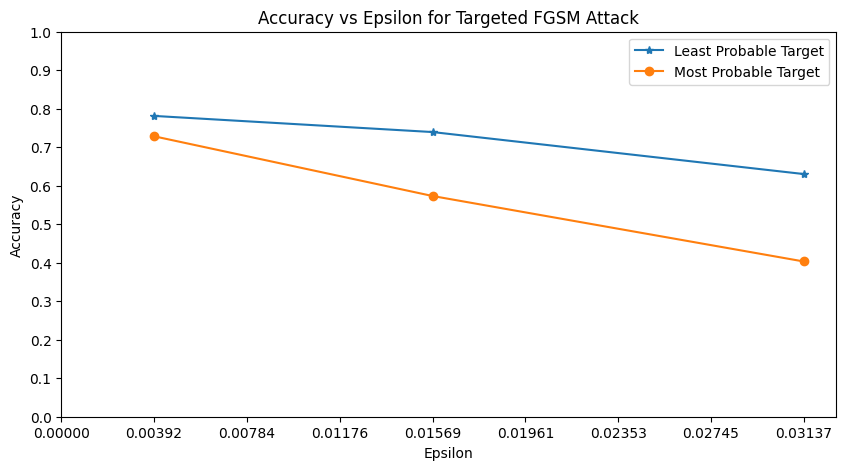

In [23]:
######################
# Your code goes here

plt.figure(figsize=(10, 5))
plt.plot(epsilons, accuracies_least_probable, "*-", label="Least Probable Target")
plt.plot(epsilons, accuracies_most_probable, "o-", label="Most Probable Target")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, max(epsilons)+1/255, step=1/255))
plt.title("Accuracy vs Epsilon for Targeted FGSM Attack")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#**Questions (10 pts)**

1. What was the effect of $\epsilon$ in targeted and untargeted FGSM attack according to your observations?

`Answer`: The parameter ϵ in the FGSM attack controls the magnitude of the perturbation added to the input image. In both targeted and untargeted FGSM attacks, a larger ϵ results in a larger perturbation. This generally makes the attack more effective, as it causes a larger deviation in the model's output. However, if ϵ is too large, the perturbation may become noticeable to the human eye, defeating the purpose of an adversarial attack, which is meant to be imperceptible.

2. Compare performance of the model on the least probable and most probable targetted FGSM attacks, justify your observation.

`Answer`: The performance of the model on targeted FGSM attacks depends on the specific target label chosen for each attack. If the target label is the least probable label according to the model's initial prediction (i.e., the label that the model initially assigns the lowest probability), then the model is likely to perform better (i.e., maintain a higher accuracy) than if the target label is the most probable label. This is because moving the model's prediction towards a label that it initially assigns a low probability requires a larger perturbation, which is harder to achieve within the limit set by ϵ. These observations are based on the general behavior of FGSM attacks and may vary depending on the specific model and dataset